In [1]:
print('hi')

hi


# 准备工作

In [39]:
# -*- coding: gb2312 -*-
from typing import Any
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import matplotlib
import joblib
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.tree._export import export_text
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

# 回归分析

## 回归原理分析

In [3]:
data:DataFrame = pd.read_csv('./data/advertising.csv',index_col=0)
print(data.iloc[0:5,:].values)

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3   9.3]
 [151.5  41.3  58.5  18.5]
 [180.8  10.8  58.4  12.9]]


Text(0, 0.5, 'sales')

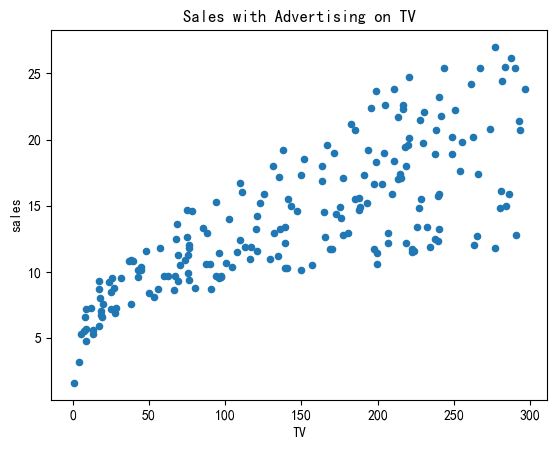

In [4]:
data.plot(kind='scatter',x='TV',y='Sales',title='Sales with Advertising on TV')
plt.xlabel('TV')
plt.ylabel('sales')

## 回归分析实现
在scikit-learn（sklearn）库中，LinearRegression函数是用于实现线性回归模型的类。线性回归是一种用于建立自变量和因变量之间线性关系的模型。通过分析自变量与因变量之间的线性关系，线性回归可以预测未知的因变量值。

下面是LinearRegression函数的一般形式：

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

LinearRegression函数没有太多参数可供调整。它主要使用两个参数：fit_intercept和normalize。

1. fit_intercept（默认值为True）：该参数决定是否需要计算截距（常数项）。如果设置为True，模型将通过最小二乘法计算截距。如果设置为False，则忽略截距。

2. normalize（默认值为False）：该参数决定是否对自变量进行归一化处理。如果设置为True，模型将在拟合之前对自变量进行归一化处理。归一化是将数据缩放到0-1范围内的过程。

在创建LinearRegression对象后，您可以使用以下方法来训练模型和进行预测：

- fit(X, y)：用于训练模型，其中X是自变量的特征矩阵，y是因变量的目标值。
- predict(X)：用于使用已训练的模型进行预测，其中X是自变量的特征矩阵。

下面是一个简单的示例，展示了如何使用LinearRegression函数进行线性回归：

```python
from sklearn.linear_model import LinearRegression

# 创建线性回归模型
model = LinearRegression()

# 训练模型
X = [[1], [2], [3], [4]]  # 自变量特征矩阵
y = [2, 4, 6, 8]  # 因变量目标值
model.fit(X, y)

# 进行预测
new_X = [[5], [6]]  # 新的自变量特征矩阵
predictions = model.predict(new_X)
print(predictions)
```
**回归模型保存在变量`linreg`中,可以通过linreg.intercept_和inreg,coef_查看**
上述示例中，我们首先创建了一个线性回归模型，然后使用`fit`方法进行训练，使用`predict`方法进行预测。在预测时，我们提供了新的自变量特征矩阵`new_X`，并打印出预测结果。

In [5]:
X=data.iloc[:,0:3] #前3列为自变量
y = data.iloc[:,3]# 最后一列为目标变量
linreg = LinearRegression()
linreg.fit(X,y)
print(linreg.intercept_,linreg.coef_)

2.9388893694594085 [ 0.04576465  0.18853002 -0.00103749]


> 可以知道解析式是 $y=0.046x_1+0.188x_2-0.001x_3+2.94$

- 将回归模型保存在文件中

In [6]:
joblib.dump(linreg,'./out/linreg.pk1')

['./out/linreg.pk1']

In [7]:
load_linreg = joblib.load('./out/linreg.pk1')
new_X=np.array([[130.1,87.8,69.2]])
print('6月广告投入:',new_X)
print('预期销售',load_linreg.predict(new_X))

6月广告投入: [[130.1  87.8  69.2]]
预期销售 [25.37401071]


E:\pythonProject4\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 回归性能评估
- RMSE
    $\delta =\sqrt{\sum_{i=1}^n{\left( y_i-\widehat{y_i} \right)}}$
    其中$n$是样本个数,$\widehat{y_i}$是预测值，$y_i$是真实值。
-模型决定系数 $R^2$
    $R^2=\frac{\sum_{i=1}^n{\left( \widehat{y_i}-\overline{y_i} \right) ^2}}{\sum_{i=1}^n{\left( y_i-\overline{y_i} \right)}}$
    其中$\overline{y_i}$是样本均值。
- 训练集和测试集
    训练集：用于训练模型，通过训练集来调整模型参数。
    测试集：用于评估模型对未见过的数据的拟合程度。
------
通常在机器学习库中，数据集切分的函数属于`model_selection`模块。最常见的数据集切分函数是`train_test_split`，它用于将数据集划分为训练集和测试集。

以下是`train_test_split`函数的常见参数和使用方法：

参数：
1. `arrays`：要切分的数据集，通常是特征矩阵和目标向量（或多个特征矩阵）。
2. `test_size`：测试集的大小。可以是浮点数（表示测试集的相对大小）或整数（表示测试集的绝对大小）。
3. `train_size`：训练集的大小。与`test_size`相似，可以是浮点数或整数。如果未指定，则默认为`1 - test_size`。
4. `random_state`：随机数种子，用于控制数据集的随机划分。通过指定相同的种子，可以确保每次运行时都得到相同的划分结果。
5. `shuffle`：是否在划分之前对数据进行洗牌。默认为`True`，表示对数据进行洗牌。
6. `stratify`：用于分类问题的标签向量。如果指定了`stratify`，则划分的训练集和测试集将保持类别分布的一致性。

使用方法：
1. 导入必要的库：通常需要导入数据集切分函数所在的机器学习库（如`sklearn`）。
2. 准备数据：将数据集划分为特征矩阵（通常是一个二维数组或数据帧）和目标向量（用于监督学习问题）。
3. 调用`train_test_split`函数：将特征矩阵、目标向量和其他参数传递给`train_test_split`函数。
4. 获取划分后的数据集：函数将返回划分后的训练集和测试集（以及可选的验证集）。

以下是一个示例代码，展示了如何使用`train_test_split`函数划分数据集：

```python
from sklearn.model_selection import train_test_split

# 准备数据
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [1, 2, 3]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印划分后的数据集
print("训练集 X:", X_train)
print("测试集 X:", X_test)
print("训练集 y:", y_train)
print("测试集 y:", y_test)
```

在上述示例中，我们将数据集`X`和目标向量`y`划分为训练集和测试集，测试集的大小为原始数据集大小的20%。`random_state`参数设置为42，以确保每次运行时得到相同的划分结果。最后，我们打印了划分后的训练集和测试集。
--------
RMSE（均方根误差）是一种用于衡量回归模型预测结果与实际观测值之间差异的评估指标。RMSE计算函数通常在机器学习库的`metrics`模块中提供。下面是一个常见的RMSE计算函数的介绍：

函数名称：`mean_squared_error`（均方误差）和`sqrt`（平方根）

参数：
1. `y_true`：实际观测值（真实值），通常是一个一维数组或列表。
2. `y_pred`：模型的预测值，与实际观测值具有相同的形状。

使用方法：
1. 导入必要的库：通常需要导入RMSE计算函数所在的机器学习库（如`sklearn`的`metrics`模块）。
2. 准备实际观测值和预测值：将实际观测值和模型的预测值准备好。
3. 调用RMSE计算函数：将实际观测值和预测值传递给RMSE计算函数。
4. 获取RMSE值：函数将返回一个表示RMSE值的浮点数。

以下是一个示例代码，展示了如何使用`mean_squared_error`和`sqrt`函数计算RMSE值：

```python
from sklearn.metrics import mean_squared_error
from math import sqrt

# 准备实际观测值和预测值
y_true = [3, 5, 8, 10]
y_pred = [2.5, 5.5, 7.5, 9.5]

# 计算均方误差（MSE）
mse = mean_squared_error(y_true, y_pred)

# 计算均方根误差（RMSE）
rmse = sqrt(mse)

# 打印RMSE值
print("RMSE:", rmse)
```

在上述示例中，我们准备了实际观测值`y_true`和预测值`y_pred`，然后使用`mean_squared_error`函数计算了均方误差（MSE），最后使用`sqrt`函数计算了均方根误差（RMSE）。最后，我们打印了计算得到的RMSE值。
------
在机器学习中，R²（R平方）是一种常用的回归模型评估指标，用于度量模型对目标变量的解释能力。在许多机器学习库中，`score`函数常用于计算R²分数。

以下是`score`函数的一般介绍：

函数名称：`score`

参数：
- `y_true`：实际观测值（真实值），通常是一个一维数组或列表。
- `y_pred`：模型的预测值，与实际观测值具有相同的形状。

使用方法：
1. 导入必要的库：通常需要导入包含`score`函数的机器学习库（如`sklearn`）。
2. 准备实际观测值和预测值：将实际观测值和模型的预测值准备好。
3. 调用`score`函数：将实际观测值和预测值传递给`score`函数。
4. 获取R²分数：函数将返回一个表示R²分数的浮点数（通常在0到1之间，越接近1表示模型拟合得更好）。

以下是一个示例代码，展示了如何使用`score`函数计算R²分数：

```python
from sklearn.metrics import r2_score

# 准备实际观测值和预测值
y_true = [3, 5, 8, 10]
y_pred = [2.5, 5.5, 7.5, 9.5]

# 计算R²分数
r2 = r2_score(y_true, y_pred)

# 打印R²分数
print("R²分数:", r2)
```

在上述示例中，我们准备了实际观测值`y_true`和预测值`y_pred`，然后使用`r2_score`函数计算了R²分数。最后，我们打印了计算得到的R²分数。



In [8]:
# 划分训练集和测试集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.35,random_state=1)
linregTr = LinearRegression()
linregTr.fit(X_train,y_train)
print(linregTr.intercept_,linregTr.coef_)

2.9324713466040873 [0.04608839 0.18047646 0.00411699]


In [9]:
#应用模型,计算结果
y_train_pred = linregTr.predict(X_train)
y_test_pred = linregTr.predict(X_test)
train_err = metrics.mean_squared_error(y_train,y_train_pred)
test_err = metrics.mean_squared_error(y_test,y_test_pred)
print(f'The mean square error of train and test are :{round(train_err,2)},{round(test_err,2)}')
# 在测试机上计算决定系数,评估性能
predict_score = linregTr.score(X_test,y_test)
print(f'The decision coefficient is :{round(predict_score,2)}')

The mean square error of train and test are :3.06,2.32
The decision coefficient is :0.91


## 分类学习
### 分类学习原理
#### 混淆矩阵(二分类问题)

| 真实类/预测类 | Class = Yes | Class = No |
|------------------|-------------|------------|
|Class  = Yes(正例)| $a$         | $b$        |
|Class = No (反例)| $c$         | $d$        |

基于混淆矩阵,准确率为被正确预测的比例:$Accuracy\,\,=\,\,\frac{a+\mathrm{d}}{a+b+c+\mathrm{d}}$
精确率: $Precison\,\,=\,\,\frac{a}{a+c}$
召回率: $Recall\,\,=\,\,\frac{a}{a+b}$
F1 : $F1 =\,\,\frac{2a}{2a+b+c}$
### 决策树
在`sklearn`库中，决策树分类模型由`DecisionTreeClassifier`类提供。下面是该模型的一般介绍以及使用方法：

**函数名称：`DecisionTreeClassifier`**

参数：
- `criterion`（可选）：用于衡量特征选择质量的标准。默认为"gini"，也可以选择"entropy"。
- `max_depth`（可选）：决策树的最大深度。默认为`None`，表示不限制最大深度。
- 其他可选参数：`min_samples_split`、`min_samples_leaf`、`max_features`等。

使用方法：
1. 导入必要的库：导入`sklearn.tree`模块中的`DecisionTreeClassifier`类。

```python
from sklearn.tree import DecisionTreeClassifier
```

2. 创建决策树分类模型对象：使用`DecisionTreeClassifier`类创建一个决策树分类模型对象，并设置相应的参数。

```python
model = DecisionTreeClassifier(criterion='gini', max_depth=None)
```

在上述代码中，我们创建了一个决策树分类模型对象`model`，设置了`criterion`为"gini"，`max_depth`为`None`。

3. 使用模型进行训练：使用训练数据集（特征矩阵和目标向量）对模型进行训练。

```python
model.fit(X_train, y_train)
```

在上述代码中，`X_train`是训练数据的特征矩阵，`y_train`是相应的目标向量。通过调用`fit`函数，模型将使用训练数据进行学习。

4. 使用模型进行预测：使用训练好的模型对新的数据进行分类预测。

```python
y_pred = model.predict(X_test)
```

在上述代码中，`X_test`是测试数据的特征矩阵，`y_pred`是模型的分类预测结果。

以上是使用`sklearn`中的`DecisionTreeClassifier`类进行决策树分类的基本步骤。您可以根据需要调整模型的参数，例如设置`max_depth`来限制树的最大深度，或者通过交叉验证等技术来进行模型评估和调优。

在机器学习中，混淆矩阵（Confusion Matrix）是一种用于评估分类模型性能的表格，它显示了模型在不同类别上的预测结果与实际标签之间的对应关系。而分类性能报告（Classification Report）是一种综合评估分类模型性能的指标报告，包括准确率、召回率、F1-score等指标。

在`sklearn`库中，可以使用`confusion_matrix`函数计算混淆矩阵，并使用`classification_report`函数生成分类性能报告。下面是这两个函数的介绍以及使用方法：

**函数名称：`confusion_matrix`**

函数功能：计算混淆矩阵

参数：
- `y_true`：实际标签，通常是一个一维数组或列表。
- `y_pred`：模型预测的标签，与实际标签具有相同的形状。

使用方法：
1. 导入必要的库：导入`sklearn.metrics`模块中的`confusion_matrix`函数。

```python
from sklearn.metrics import confusion_matrix
```

2. 计算混淆矩阵：使用`confusion_matrix`函数计算混淆矩阵。

```python
cm = confusion_matrix(y_true, y_pred)
```

在上述代码中，`y_true`是实际标签，`y_pred`是模型预测的标签。函数将返回一个表示混淆矩阵的二维数组。

**函数名称：`classification_report`**

函数功能：生成分类性能报告

参数：
- `y_true`：实际标签，通常是一个一维数组或列表。
- `y_pred`：模型预测的标签，与实际标签具有相同的形状。
- `target_names`（可选）：类别名称，用于报告中的标签。

使用方法：
1. 导入必要的库：导入`sklearn.metrics`模块中的`classification_report`函数。

```python
from sklearn.metrics import classification_report
```

2. 生成分类性能报告：使用`classification_report`函数生成分类性能报告。

```python
report = classification_report(y_true, y_pred, target_names=target_names)
```

在上述代码中，`y_true`是实际标签，`y_pred`是模型预测的标签，`target_names`是类别名称列表（可选）。函数将返回一个表示分类性能报告的字符串。


In [10]:
# 建立决策树分类模型,为银行客户偿还贷款数据集构造分类器,并评估性能
data = pd.read_csv('./data/bankdebt.csv',nrows=5,index_col=0,header = None )
print(data)

     1         2     3    4
0                          
1  Yes    Single  12.5   No
2   No   Married  10.0   No
3   No    Single   7.0   No
4  Yes   Married  12.0   No
5   No  Divorced   9.5  Yes


In [11]:
# 将字符串参数替换为数值形参数
data = pd.read_csv('./data/bankdebt.csv',index_col=0,header = None )
data.loc[data[1] == 'Yes',1]=1
data.loc[data[1]=='No',1]=0
data.loc[data[4]=='Yes',4]=1
data.loc[data[4]=='No',4]=0
data.loc[data[2]=='Single',2]=1
data.loc[data[2]=='Married',2]=2
data.loc[data[2]=='Divorced',2]=3
print(data)

    1  2     3  4
0                
1   1  1  12.5  0
2   0  2  10.0  0
3   0  1   7.0  0
4   1  2  12.0  0
5   0  3   9.5  1
6   0  2   6.0  0
7   1  3  22.0  0
8   0  1   8.5  1
9   0  2   7.5  0
10  0  1   9.0  1
11  0  1   5.5  1
12  1  2   8.0  0
13  1  3  11.0  0
14  0  1   9.5  0
15  0  3   6.7  1


In [12]:
# 前3列特征值,最后一列分类值(必须是整型)赋值给y,分类器的score算出ACCURACY
X= data.loc[:, 1:3]
y = data.loc[:, 4].astype(int) #一定要加上整型转换
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
clf.score(X,y)

1.0

In [13]:
#对分类器进行性能评估
predict_y = clf.predict(X)
print(metrics.classification_report(y,predict_y))
print("Confusion martix")
print(metrics.confusion_matrix(y,predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion martix
[[10  0]
 [ 0  5]]


In [14]:
# 显示生成的决策树
fName = ['House','Marital','Income']
clfStruc = export_text(clf, feature_names=fName)
print(clfStruc)

|--- Income <= 9.75
|   |--- Marital <= 2.50
|   |   |--- Marital <= 1.50
|   |   |   |--- Income <= 9.25
|   |   |   |   |--- Income <= 7.75
|   |   |   |   |   |--- Income <= 6.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Income >  6.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Income >  7.75
|   |   |   |   |   |--- class: 1
|   |   |   |--- Income >  9.25
|   |   |   |   |--- class: 0
|   |   |--- Marital >  1.50
|   |   |   |--- class: 0
|   |--- Marital >  2.50
|   |   |--- class: 1
|--- Income >  9.75
|   |--- class: 0



# SVM 支持向量机
在scikit-learn（sklearn）中，支持向量机（Support Vector Machines，SVM）是一个强大的机器学习算法，用于分类和回归问题。SVM的基本思想是通过在特征空间中找到一个最优超平面，将不同类别的样本分开。

以下是sklearn中支持向量机的主要组件和功能：

1. `svm.SVC`和`svm.LinearSVC`类：sklearn提供了两个主要的支持向量机类。`svm.SVC`用于非线性分类问题，而`svm.LinearSVC`用于线性分类问题。这两个类都可以处理多类别分类任务。

2. 核函数（Kernel Functions）：SVM在高维空间中使用核函数来处理非线性问题。sklearn提供了多种常用的核函数，包括线性核、多项式核、径向基函数（RBF）核等。你可以根据具体问题选择合适的核函数。

3. 超参数调优：SVM有一些重要的超参数需要调优，以获得最佳的分类性能。例如，你可以通过调整正则化参数C、核函数的参数gamma等来改善模型的性能。sklearn提供了GridSearchCV和RandomizedSearchCV等工具来帮助你进行超参数的自动化调优。

4. 特征缩放：SVM对特征缩放非常敏感，因此在使用SVM之前，通常需要对特征进行标准化或归一化处理。sklearn中的preprocessing模块提供了一些实用的功能来处理特征缩放，如MinMaxScaler和StandardScaler。

5. 交叉验证：为了评估SVM模型的性能和避免过拟合，你可以使用sklearn中的交叉验证功能。例如，可以使用KFold或StratifiedKFold将数据集划分为训练集和验证集，并进行多次训练和评估。

6. 支持向量的属性：训练完成的SVM模型可以提供一些有用的属性，如支持向量的索引、支持向量的类别标签、决策函数的值等。这些属性可以帮助你进行进一步的分析和可视化。

7. 多类别分类：SVM原本是一个二分类算法，但sklearn中的SVM实现可以直接应用于多类别分类问题。sklearn使用了一种称为"one-vs-one"或"one-vs-rest"的策略来处理多类别分类。

`svm.SVC`是scikit-learn中用于支持向量机分类的类。它的参数可以用来调整模型的行为和性能。下面是`svm.SVC`的一些重要参数及其作用：

1. `C`（默认值为1.0）：正则化参数，控制了错误分类样本的惩罚程度。较小的C值会使得决策边界更加平滑，容忍更多的错误分类样本；较大的C值会使得决策边界更加严格，尽量正确分类样本。

2. `kernel`（默认值为"rbf"）：核函数的选择。常用的核函数包括线性核（"linear"）、多项式核（"poly"）、径向基函数核（"rbf"）等。不同的核函数对应不同的非线性映射，可以处理不同形状的决策边界。

3. `degree`（默认值为3）：多项式核函数的阶数。只有在`kernel`为"poly"时才有效。较高的阶数可以处理更复杂的非线性关系，但可能导致过拟合。

4. `gamma`（默认值为"scale"）：径向基函数核的系数。可以是"scale"（默认）或"auto"，它们分别代表使用1 /（n_features * X.var（））或1 / n_features作为gamma值。较大的gamma值会使得决策边界更关注支持向量，可能导致过拟合。

5. `coef0`（默认值为0.0）：核函数中的独立项。只有在`kernel`为"poly"或"sigmoid"时才有效。它控制了高阶多项式核和sigmoid核的影响。

6. `shrinking`（默认值为True）：是否使用启发式方法来加速模型训练。启发式方法可以忽略一些支持向量，从而加快训练速度。但是，对于小型数据集或需要精确结果的情况，可以将其设置为False。

7. `probability`（默认值为False）：是否启用概率估计。如果设置为True，则模型将生成类别预测的概率。


In [15]:
# 读取文件
data = pd.read_csv('./data/bankpep.csv',index_col='id')

In [16]:
# 将YES和NO替换成1,0;sex的特征值替换成1,0
seq = ['married', 'car', 'save_act', 'current_act', 'mortgage', 'pep']
for feature in seq :  # 逐个特征进行替换
    data.loc[ data[feature] == 'YES', feature ] =1
    data.loc[ data[feature] == 'NO', feature ] =0

#将性别转换为整数1和0
data.loc[ data['sex'] == 'FEMALE', 'sex'] =1
data.loc[ data['sex'] == 'MALE', 'sex'] =0

print(data[0:5])

         age sex      region   income married  children car save_act  \
id                                                                     
ID12101   48   1  INNER_CITY  17546.0       0         1   0        0   
ID12102   40   0        TOWN  30085.1       1         3   1        0   
ID12103   51   1  INNER_CITY  16575.4       1         0   1        1   
ID12104   23   1        TOWN  20375.4       1         3   0        0   
ID12105   57   1       RURAL  50576.3       1         0   0        1   

        current_act mortgage pep  
id                                
ID12101           0        0   1  
ID12102           1        1   0  
ID12103           1        0   0  
ID12104           1        0   0  
ID12105           0        0   0  


在pandas中，`get_dummies()`函数用于执行独热编码（One-Hot Encoding）操作。独热编码是将分类变量转换为二进制向量的常用方法，使得机器学习算法可以更好地处理这些变量。

下面是`get_dummies()`函数的介绍：

函数签名：
```python
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, drop_first=False)
```

参数说明：
- `data`：输入的数据，可以是Series、DataFrame或其他可迭代对象。
- `prefix`：生成的独热编码列名称的前缀。默认情况下，生成的列名将与原始分类变量相同。
- `prefix_sep`：生成的独热编码列名称的分隔符，默认为下划线。
- `dummy_na`：是否为缺失值（NaN）创建独热编码列，默认为False。
- `columns`：指定要进行独热编码的列。如果不指定，将对所有分类变量进行编码。
- `drop_first`：是否删除生成的独热编码中的第一列，默认为False。如果设置为True，将会删除第一列，以避免多重共线性问题。

返回值：
- 返回一个新的DataFrame，其中包含根据输入数据生成的独热编码列。

`get_dummies()`函数会将分类变量转换为二进制的0和1，每个分类变量的每个可能取值都会生成一个新的列。对于原始数据中的每个分类变量，如果某个样本的该变量取值为该列的名称，则对应位置为1，否则为0。这样，机器学习算法就可以直接处理这些二进制特征。

以下是一个示例，展示如何使用`get_dummies()`函数进行独热编码：

```python
import pandas as pd

# 创建一个包含分类变量的DataFrame
data = pd.DataFrame({'color': ['red', 'blue', 'green', 'red', 'green']})

# 进行独热编码
encoded_data = pd.get_dummies(data)

print(encoded_data)
```

输出：
```
   color_blue  color_green  color_red
0           0            0          1
1           1            0          0
2           0            1          0
3           0            0          1
4           0            1          0
```

在上述示例中，原始的`color`列被转换为三个新的列`color_blue`、`color_green`和`color_red`，每个可能取值都对应一个列，并使用0和1进行编码。

In [17]:
#region ,children的取值超过两种,需要进行独热编码
dumm_reg = pd.get_dummies(data['region'],prefix='region')
dumm_child =pd.get_dummies(data['children'],prefix='children')
#删除原来两列
df1 = data.drop(['region','children'],axis=1)
#拼接
df2 = df1.join([dumm_reg,dumm_child],how='outer')
print(df2[0:5])

         age sex   income married car save_act current_act mortgage pep  \
id                                                                        
ID12101   48   1  17546.0       0   0        0           0        0   1   
ID12102   40   0  30085.1       1   1        0           1        1   0   
ID12103   51   1  16575.4       1   1        1           1        0   0   
ID12104   23   1  20375.4       1   0        0           1        0   0   
ID12105   57   1  50576.3       1   0        1           0        0   0   

         region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  \
id                                                                       
ID12101               True         False            False        False   
ID12102              False         False            False         True   
ID12103               True         False            False        False   
ID12104              False         False            False         True   
ID12105              False    

In [18]:
#换成0和1
#region ,children的取值超过两种,需要进行独热编码
lis = ['region_INNER_CITY',
 'region_RURAL',
 'region_SUBURBAN',
 'region_TOWN',
 'children_0',
 'children_1',
 'children_2',
 'children_3']
for ls in lis:
    df2[ls]=df2[ls].astype(int)
df2.head()

,age,sex,income,married,car,save_act,current_act,mortgage,pep,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,children_0,children_1,children_2,children_3
id,,,,,,,,,,,,,,,,,
ID12101,48,1,17546.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
ID12102,40,0,30085.1,1,1,0,1,1,0,0,0,0,1,0,0,0,1
ID12103,51,1,16575.4,1,1,1,1,0,0,1,0,0,0,1,0,0,0
ID12104,23,1,20375.4,1,0,0,1,0,0,0,0,0,1,0,0,0,1
ID12105,57,1,50576.3,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [19]:
#pep 是分类标签作为y,其余值是x
X = df2.drop(['pep'],axis=1)
y = df2['pep'].astype(int)
clf = svm.SVC(kernel='rbf',gamma=0.6,C=100)
clf.fit(X,y)
print('Accuracy: ',clf.score(X,y))
#评价性能
y_predicted = clf.predict(X)
print(metrics.classification_report(y,y_predicted))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       274

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [20]:
# 划分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
clf = svm.SVC(kernel='rbf',gamma=0.7,C=1.0)
clf.fit(X_train,y_train)
print("训练集性能:",clf.score(X_train,y_train))
print("测试集性能",clf.score(X_test,y_test))

训练集性能: 1.0
测试集性能 0.5555555555555556


In [21]:
# 数据标准化
X_scale = preprocessing.scale(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
clf = svm.SVC(kernel='rbf',gamma=0.7,C=1.0)
clf.fit(X_train,y_train)
print("训练集性能:",clf.score(X_train,y_train))
print("测试集性能",clf.score(X_test,y_test))

训练集性能: 1.0
测试集性能 0.5388888888888889


## 聚类任务
机器学习中的聚类任务是一种无监督学习方法，其目标是将数据集中的样本划分为若干个相似的组或簇，使得同一簇内的样本相似度较高，而不同簇之间的样本相似度较低。聚类任务的目的是发现数据中的内在结构和模式，以便更好地理解数据和进行进一步的分析。

在聚类任务中，没有预先定义的类别或标签信息可供参考，算法需要自主发现样本之间的相似性和差异性。聚类算法通常基于一些相似性度量或距离度量来计算样本之间的相似性，并根据相似性度量将样本分配到不同的簇中。

以下是一些常见的聚类算法：

1. K均值聚类（K-means Clustering）：K均值是一种迭代算法，它将数据集划分为K个簇，每个簇由距离最近的质心（簇中心）来表示。算法首先随机选择K个质心，然后迭代地将每个样本分配给离其最近的质心，并更新质心的位置，直到达到收敛条件。

2. 层次聚类（Hierarchical Clustering）：层次聚类算法通过逐步合并或分割簇来构建聚类层次结构。它可以是自下而上的聚合（聚集）方法，也可以是自上而下的分割（分裂）方法。层次聚类可以通过树状图（聚类树）来表示，其中每个节点表示一个簇。

3. 密度聚类（Density-based Clustering）：密度聚类算法根据样本之间的密度来划分簇。它将样本看作是位于高密度区域的核心点，通过连接核心点形成簇。DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种常见的密度聚类算法。

4. 高斯混合模型（Gaussian Mixture Model，GMM）：GMM假设数据由多个高斯分布组成，每个高斯分布代表一个簇。GMM通过估计每个高斯分布的参数（均值和协方差矩阵）来进行聚类。每个样本都以一定的概率属于每个高斯分布，从而确定其所属的簇。

聚类任务在许多领域中都有广泛的应用，例如市场分割、图像分割、文本聚类和社交网络分析等。选择适当的聚类算法取决于数据的特点和应用需求。
## Kmeans
K均值算法（K-means algorithm）是一种常用的聚类算法，用于将数据集划分为K个簇。它是一种迭代算法，其核心思想是通过最小化样本点与所属簇质心之间的距离来确定每个样本所属的簇。

K均值算法的工作流程如下：

1. 初始化：随机选择K个质心作为初始簇中心，可以是随机选择数据集中的K个样本点，或者根据领域知识进行初始化。

2. 分配样本到簇：对于每个样本，计算其与每个质心之间的距离（通常使用欧氏距离或曼哈顿距离），将样本分配给距离最近的质心所属的簇。

3. 更新质心：对于每个簇，计算簇中所有样本的均值，将均值作为新的质心位置。

4. 重复步骤2和步骤3，直到质心的位置不再变化或达到预定义的迭代次数上限。

5. 输出结果：最终得到K个簇，每个样本被分配到一个簇中。

K均值算法的优点包括简单易实现、计算效率高，并且在处理大数据集时具有较好的可伸缩性。然而，K均值算法也有一些限制和注意事项：

1. 需要预先指定簇的数量K，这对于某些情况下可能是困难的。

2. K均值算法对初始质心的选择敏感，不同的初始质心可能导致不同的聚类结果。

3. K均值算法假设每个簇的形状为凸形状，对于非凸形状的簇可能效果不佳。

4. K均值算法对异常值（离群点）较为敏感，异常值可能会影响质心的计算和簇的划分。

为了克服K均值算法的一些限制，可以采用一些改进的方法，如K均值++算法用于改进初始质心的选择，或者使用层次聚类等方法来自动确定簇的数量。此外，还可以使用评估指标（如轮廓系数）来评估聚类结果的质量，并选择最佳的K值。
scikit-learn 是一个常用的机器学习库，提供了各种聚类算法的实现，包括 K 均值聚类。KMeans 函数是 scikit-learn 中用于执行 K 均值聚类的函数。

KMeans 函数的作用是对给定的数据集进行 K 均值聚类，将数据集划分为 K 个簇。它使用迭代的方式，通过最小化样本点与所属簇质心之间的距离来确定每个样本所属的簇。

下面是 KMeans 函数的基本用法示例：

```python
from sklearn.cluster import KMeans

# 创建 KMeans 对象
kmeans = KMeans(n_clusters=K)

# 使用数据集进行聚类
kmeans.fit(data)

# 获取聚类结果
labels = kmeans.labels_

# 获取质心（簇中心）的坐标
centroids = kmeans.cluster_centers_
```

上述代码中，你需要根据实际情况导入 `KMeans` 类，并根据需要设置聚类的簇数 `K`。然后，创建一个 KMeans 对象，并传入 `n_clusters` 参数指定簇数。

接下来，使用 `fit` 方法将数据集 `data` 传递给 KMeans 对象，执行聚类操作。聚类完成后，可以使用 `labels_` 属性获取每个样本点的簇标签，即样本所属的簇的索引。可以使用 `cluster_centers_` 属性获取各个簇的质心（簇中心）坐标。

除了上述常用的用法，KMeans 函数还提供了其他一些参数和方法，例如：

- `init`：初始化质心的方法，默认为 "k-means++"，也可以选择 "random" 等。
- `max_iter`：最大迭代次数，控制算法的收敛性。
- `random_state`：随机种子，用于复现结果的随机性。
- `predict`：将新样本点分配到最近的簇。
- `transform`：计算样本点到各个簇质心的距离。

你可以根据具体需求，参考 scikit-learn 的文档对 KMeans 函数的更多参数和方法进行了解和使用。

In [22]:
data = pd.read_csv('./data/iris.data',header=None);
data.columns=['sepal length','sepal width','petal length','petal width','class'];
data.iloc[0:5,:]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


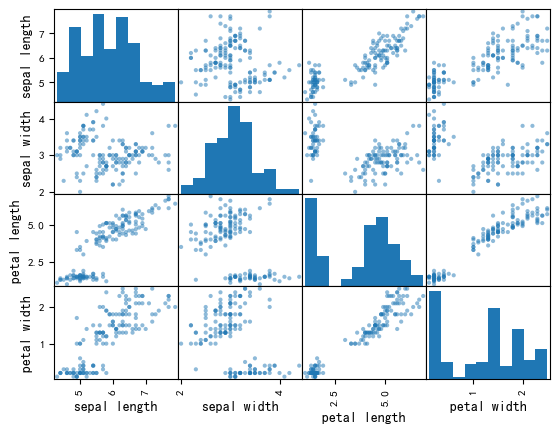

In [23]:
# 四维空间的数据特性无法直接进行观察,需要绘制散点图
pd.plotting.scatter_matrix(data,diagonal='hist');

In [25]:
# 定义簇的个数为3,忽略数据分类标签,取前4列特征值,训练聚类模型
X = data.iloc[:,0:4]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#用lmeans.labels_获取结果
kmeans.labels_

E:\pythonProject4\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

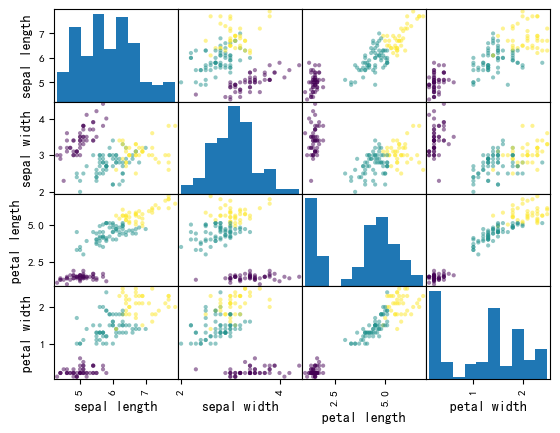

In [26]:
pd.plotting.scatter_matrix(data,c=kmeans.labels_,diagonal='hist');

### 聚类性能评估
在 scikit-learn 中，`sklearn.metrics.cluster` 模块提供了一系列用于评估聚类算法结果的指标和函数。这些指标和函数可以帮助你衡量聚类的质量、比较不同聚类结果以及评估聚类算法的性能。

下面是一些常用的 `sklearn.metrics.cluster` 中的指标和函数：

1. `adjusted_rand_score(labels_true, labels_pred)`：计算调整后的兰德指数（Adjusted Rand Index，ARI），用于评估聚类结果与真实标签之间的相似程度。取值范围为 [-1, 1]，值越接近 1 表示聚类结果与真实标签越相似。

2. `silhouette_score(X, labels)`：计算轮廓系数（Silhouette Coefficient），用于衡量聚类结果的紧密度和分离度。取值范围为 [-1, 1]，值越接近 1 表示聚类结果越好。

3. `calinski_harabasz_score(X, labels)`：计算 Calinski-Harabasz 指数，用于评估聚类结果的紧密度和分离度。该指数值越大表示聚类结果越好。

4. `completeness_score(labels_true, labels_pred)`：计算完整性（Completeness），表示同一个真实类别的样本都被分配到了同一个簇中的程度。

5. `homogeneity_score(labels_true, labels_pred)`：计算同质性（Homogeneity），表示同一个聚类簇中的样本都属于同一个真实类别的程度。

除了上述指标，`sklearn.metrics.cluster` 还提供了其他一些函数，例如计算聚类结果的互信息（mutual information）和标准化互信息（normalized mutual information）等。

这些指标和函数可以帮助你评估聚类算法的效果，选择最佳的聚类算法或调整聚类参数。你可以根据具体需求，在 scikit-learn 的文档中查找并了解更多关于 `sklearn.metrics.cluster` 模块中提供的指标和函数的详细信息。

In [28]:
# 将类别名转换成整数值
data.loc[data['class'] == 'Iris-setosa', 'class'] = 0;
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 1;
data.loc[data['class'] == 'Iris-virginica', 'class'] = 2;
y = data['class']
metrics.cluster.adjusted_mutual_info_score(y,kmeans.labels_)

0.7551191675800484

In [29]:
# 计算轮廓系数
metrics.cluster.silhouette_score(X, kmeans.labels_,metric='euclidean')

0.5525919445499757

E:\pythonProject4\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\pythonProject4\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\pythonProject4\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\pythonProject4\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

Text(0, 0.5, 'Silhouette coefficient')

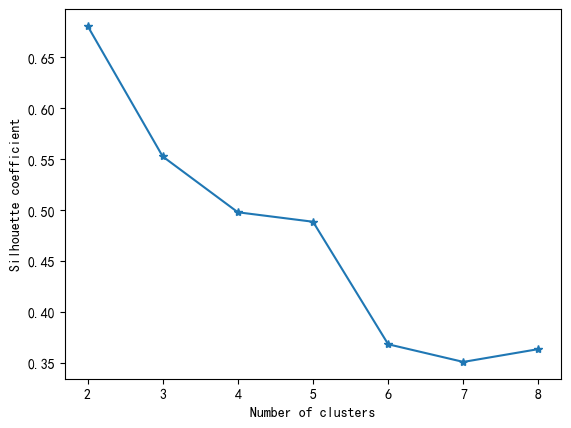

In [30]:
# 确定初值k
clusters = [2,3,4,5,6,7,8]
sc_scores = []
for i in clusters:
    kmeans = KMeans(n_clusters=i).fit(X)
    sc = metrics.cluster.silhouette_score(X,kmeans.labels_,metric='euclidean')
    sc_scores.append(sc)
plt.plot(clusters,sc_scores,'*-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')

### 数据降维
PCA（Principal Component Analysis）是一种常见的线性降维方法，用于将高维数据转换为低维表示。它通过找到数据中的主成分来实现降维，其中主成分是原始特征的线性组合，并且彼此正交。PCA 的目标是在保留尽可能多的数据方差的同时减少数据的维度。

在 scikit-learn 中，PCA 的实现可以通过 `sklearn.decomposition.PCA` 类来完成。下面是 PCA 的基本用法示例：

```python
from sklearn.decomposition import PCA

# 创建 PCA 对象
pca = PCA(n_components=k)  # k 是你想要选择的主成分个数或目标维度

# 使用数据集进行降维
new_data = pca.fit_transform(data)

# 获取主成分的方差解释比例
explained_var_ratio = pca.explained_variance_ratio_
```

上述代码中，你需要根据实际情况导入 `PCA` 类，并根据需要设置主成分的个数或目标维度 `k`。然后，创建一个 PCA 对象，并传入 `n_components` 参数。

接下来，使用 `fit_transform` 方法将数据集 `data` 传递给 PCA 对象，执行降维操作。降维后的数据将存储在 `new_data` 中，其中每一行代表一个样本在降维后的表示。

此外，你还可以使用 `explained_variance_ratio_` 属性获取每个主成分的方差解释比例，它表示每个主成分所解释的数据方差的比例。

需要注意的是，PCA 是一种无监督学习方法，不考虑类别信息。如果你希望在降维时考虑类别信息，你可以使用 scikit-learn 中的 PCR（Principal Component Regression）方法，它结合了 PCA 和线性回归。PCR 可以用于降维和回归分析，通过提取主成分来减少特征的维度，并在降维后的表示上进行线性回归。

PCR 在 scikit-learn 中没有单独的实现，但你可以通过组合 PCA 和线性回归模型来实现 PCR。首先使用 PCA 进行降维，然后使用降维后的数据进行线性回归分析。这个组合使用的方法可以根据具体的需求和任务进行调整和定制。
PCA 方法中的参数可以影响降维的结果和性能。下面是 PCA 方法中的一些常用参数的介绍：

1. `n_components`：指定降维后的目标维度或选择的主成分个数。可以是一个整数值，表示要保留的主成分的数量；也可以是一个浮点数（0 到 1之间），表示要保留的主成分方差解释比例的阈值。

2. `whiten`：布尔值，控制是否对降维后的数据进行白化处理。白化是一种线性变换，用于使降维后的数据具有相等的方差，并且彼此不相关。

3. `svd_solver`：指定奇异值分解（SVD）的解算器，用于计算主成分。可选的取值有："auto"、"full"、"arpack"和"randomized"。默认值为 "auto"，它会根据数据的特征数量和样本数量自动选择最适合的解算器。

4. `tol`：用于指定 SVD 迭代的收敛容忍度。当 SVD 迭代的相对误差小于此容忍度时，算法将停止迭代。

5. `iterated_power`：用于指定幂迭代的次数。幂迭代是 SVD 过程中的一步，用于估计主成分。

6. `random_state`：用于控制随机数生成器的种子，以确保结果的可复现性。

这些是 PCA 方法中的一些常用参数，你可以根据具体的需求和数据特点进行调整。需要注意的是，PCA 方法是基于线性变换的降维方法，对于非线性数据集可能效果有限。在某些情况下，你可能需要考虑使用其他降维方法，如核主成分分析（Kernel PCA）等。在选择参数和方法时，建议进行实验和评估以确定最适合你的数据集的降维方案。

In [32]:
pca = PCA(n_components=2)
pca.fit(X)
print('explained variance:',pca.explained_variance_)
print('components',pca.components_)
print('explained ration',pca.explained_variance_ratio_)

explained variance: [4.22484077 0.24224357]
components [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
explained ration [0.92461621 0.05301557]


In [35]:
# 将四维数据转化为二维数据
new_X =pca.transform(X)
new_X

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: object

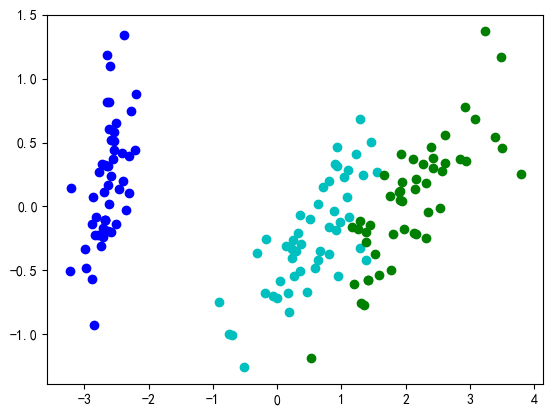

In [37]:
colors = ['b','c','g']
for i in range(0,3):
    cl = new_X[y==i]
    plt.scatter(cl[:,0],cl[:,1],color=colors[i])

## 集成学习
在集成学习中，RandomForestClassifier 是一种基于随机森林的分类器，它是 scikit-learn 库中的一个重要实现。随机森林是一种集成学习算法，通过组合多个决策树来进行分类任务。

下面是使用 RandomForestClassifier 的基本步骤：

1. 导入库和数据：

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 导入数据，假设 X 是特征矩阵，y 是目标向量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

首先，你需要导入 `RandomForestClassifier` 类和其他必要的库。然后，使用 `train_test_split` 函数将数据集拆分为训练集和测试集。

2. 创建和训练随机森林模型：

```python
# 创建 RandomForestClassifier 对象
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 在训练集上拟合模型
rf_classifier.fit(X_train, y_train)
```

在这一步，你可以创建一个 `RandomForestClassifier` 对象，并设置一些参数。其中，`n_estimators` 参数表示森林中树的数量，你可以根据需要进行调整。然后，使用 `fit` 方法在训练集上拟合模型。

3. 预测和评估：

```python
# 在测试集上进行预测
y_pred = rf_classifier.predict(X_test)

# 评估模型性能
accuracy = rf_classifier.score(X_test, y_test)
```

使用训练好的模型对测试集进行预测，可以通过 `predict` 方法获得预测结果。然后，你可以使用 `score` 方法计算分类器在测试集上的准确性。

除了上述基本步骤外，RandomForestClassifier 还有许多其他参数可以进行调整，以满足你的需求。例如，你可以设置树的最大深度、最小样本拆分数量、特征重要性的计算方法等。通过调整这些参数，你可以优化模型的性能和结果。

总结起来，RandomForestClassifier 是一个强大的集成学习分类器，它基于随机森林的思想，能够有效地处理分类问题，并具有较好的泛化能力。在实际应用中，你可以根据数据集的特点和任务需求，调整参数以获得最佳的分类性能。

In [38]:
df2


,age,sex,income,married,car,save_act,current_act,mortgage,pep,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,children_0,children_1,children_2,children_3
id,,,,,,,,,,,,,,,,,
ID12101,48,1,17546.00,0,0,0,0,0,1,1,0,0,0,0,1,0,0
ID12102,40,0,30085.10,1,1,0,1,1,0,0,0,0,1,0,0,0,1
ID12103,51,1,16575.40,1,1,1,1,0,0,1,0,0,0,1,0,0,0
ID12104,23,1,20375.40,1,0,0,1,0,0,0,0,0,1,0,0,0,1
ID12105,57,1,50576.30,1,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12696,61,1,47025.00,0,1,1,1,1,0,1,0,0,0,0,0,1,0
ID12697,30,1,9672.25,1,1,1,1,0,0,1,0,0,0,1,0,0,0
ID12698,31,1,15976.30,1,1,1,0,0,1,0,0,0,1,1,0,0,0


In [ ]:
x = df2.drop(['pep'],axis=1)
y = df2['pep']
X_train,X_test,y_train,y_test =model_selection. train_test_split(X,y,test_size=0.3,random_state=1)
